In [ ]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch
from torch import nn

In [74]:
apple = yf.Ticker("AAPL")
stock_df = apple.history(start="2024-01-01", end="2024-08-16")
stock_df.reset_index(inplace=True)
stock_df.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)
#stock_df['Date'] = stock_df['Date'].dt.date
stock_df.head(5)


,Date,Open,High,Low,Close,Volume
0,2024-01-02 00:00:00-05:00,186.033057,187.315366,182.792518,184.532074,82488700
1,2024-01-03 00:00:00-05:00,183.120556,184.770652,182.335262,183.150375,58414500
2,2024-01-04 00:00:00-05:00,181.062929,181.997322,179.800520,180.824371,71983600
3,2024-01-05 00:00:00-05:00,180.903888,181.669281,179.094742,180.098709,62303300
4,2024-01-08 00:00:00-05:00,181.003268,184.492330,180.416793,184.452560,59144500


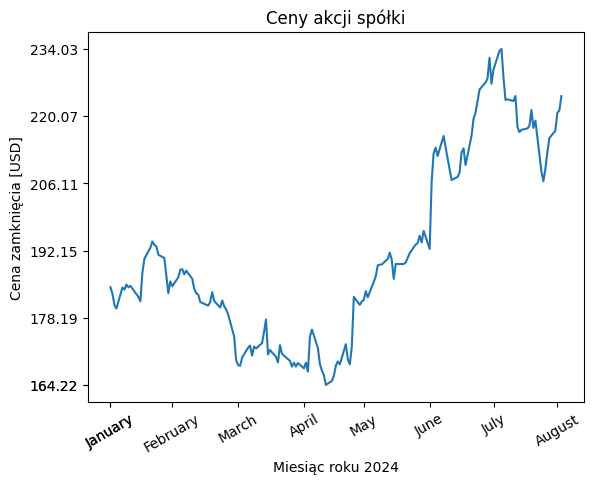

In [75]:
axes = sns.lineplot(data=stock_df, x='Date', y='Close')

x_ticks = [stock_df['Date'].iloc[0]]
x_ticks += list(stock_df['Date'].iloc[::len(stock_df)//7])

x_ticks_labels = [stock_df['Date'].dt.month_name().iloc[0]]
x_ticks_labels += list(stock_df['Date'].dt.month_name().iloc[::len(stock_df)//7])

y_min = stock_df['Close'].min()
y_max = stock_df['Close'].max()
# Minimalny punkt
y_ticks = [y_min]
# Kilka punktów pomiędzy wartością minimalną, a maksymalną
y_ticks += list([y_min + i * (y_max-y_min)/5 for i in range(5)])  
# Maksymalny punkt
y_ticks.append(y_max) 

# Ustawienie rozdziałki opisów osi X i Y
axes.set_xticks(ticks=x_ticks)
axes.set_xticklabels(labels=x_ticks_labels, rotation=30)
axes.set_yticks(y_ticks)
# Opis wykresu
plt.xlabel('Miesiąc roku 2024')
plt.ylabel('Cena zamknięcia [USD]')
plt.title('Ceny akcji spółki')
plt.show()

c:\Users\Home\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)


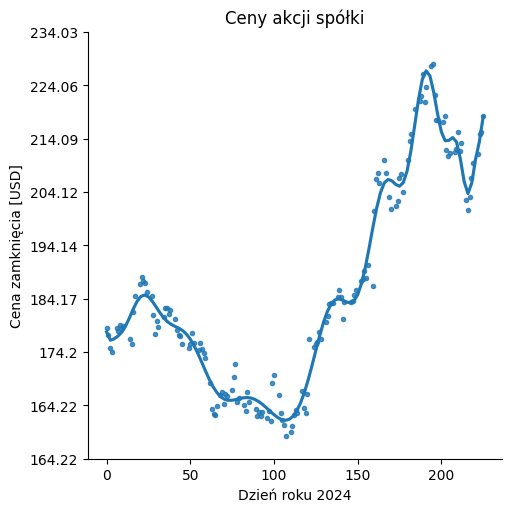

In [95]:
stock_df['DateNumeric'] = (stock_df['Date'] - stock_df['Date'].min()).dt.days
axes = sns.lmplot(data=stock_df, x='DateNumeric', y='Close', order=40, ci=None, markers=".")

y_min = stock_df['Close'].min()
y_max = stock_df['Close'].max()
y_ticks = [round(y_min,2)]  # Minimalny punkt
y_ticks += list([round(y_min + i * (y_max-y_min)/7,2) for i in range(7)])  # Kilka punktów pomiędzy
y_ticks.append(round(y_max,2))  # Maksymalny punkt

axes.set_yticklabels(labels=y_ticks)
# Opis wykresu
plt.xlabel('Dzień roku 2024')
plt.ylabel('Cena zamknięcia [USD]')
plt.title('Ceny akcji spółki')
plt.show()

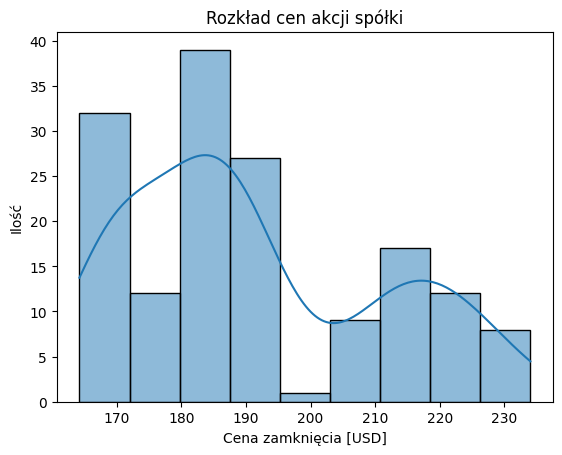

In [90]:
sns.histplot(data=stock_df['Close'],  kde=True).set_xlabel(xlabel='Cena zamkniecia [USD]')

# Opis wykresu
plt.xlabel('Cena zamknięcia [USD]')
plt.ylabel('Ilość')
plt.title('Rozkład cen akcji spółki')
plt.show()

In [105]:
n_past = 30
n_out = 1

close_prices = stock_df['Close'].values
X = []
y = []

for i in range(n_past, len(close_prices) - n_out + 1):
    X.append(close_prices[i - n_past:i])  # Sekwencja z n_past dni
    y.append(close_prices[i:i + n_out])   # Cena akcji z dnia następnego dla danej sekwencji
    
X = np.array(X)
y = np.array(y)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [110]:
scaler = MinMaxScaler(feature_range=(0,1))

X_train_scaled = [scaler.fit_transform(X_train_series.reshape(-1,1)) for X_train_series in X_train]
X_test_scaled = [scaler.fit_transform(X_test_series.reshape(-1,1)) for X_test_series in X_test]
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.fit_transform(y_test)

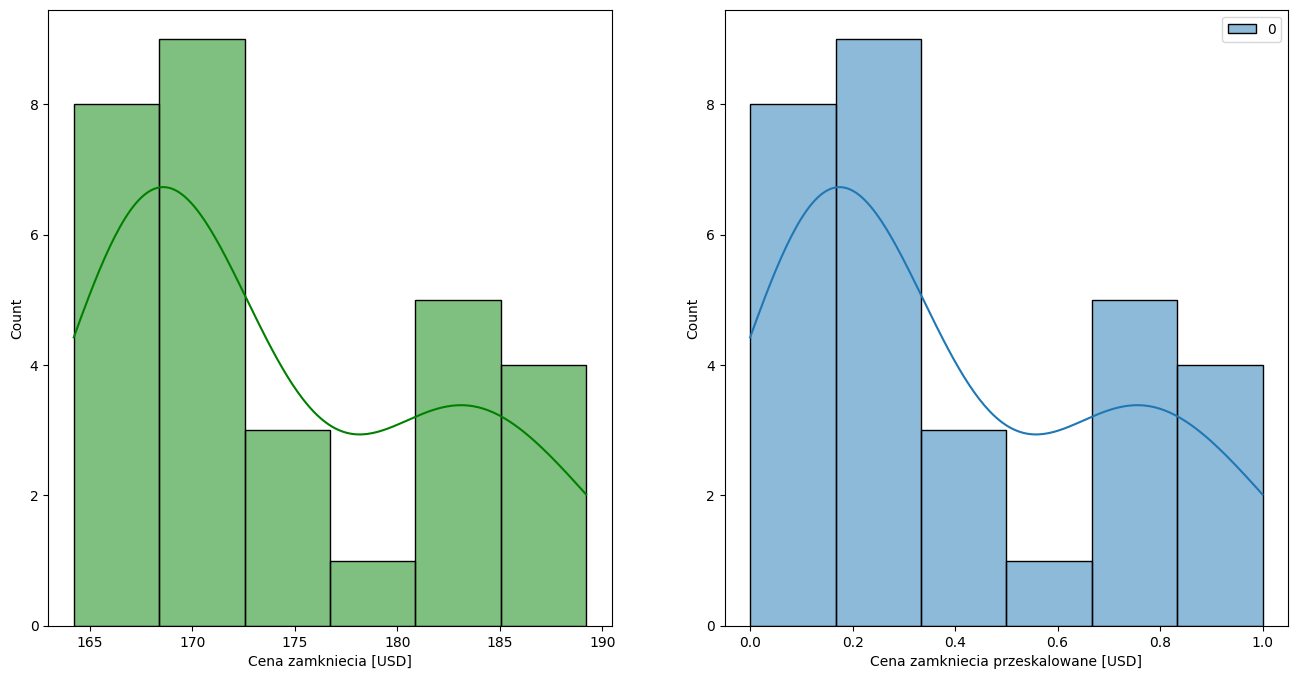

In [111]:
first_training_row = X_train[0]
first_training_row_scaled = X_train_scaled[0]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,8))
sns.histplot(data=first_training_row, color='green', kde=True, ax=ax1).set_xlabel(xlabel='Cena zamkniecia [USD]')
sns.histplot(data=first_training_row_scaled, kde=True, ax=ax2).set_xlabel(xlabel='Cena zamkniecia przeskalowane [USD]')
plt.show()